In [18]:
import numpy as np
import pandas as pd
import scipy.stats as scs

np.random.seed(0)

import matplotlib.pyplot as plt

In [19]:
covid = pd.read_csv('covid_clean.csv')

#covid.info()

In [20]:
#remove information that won't help our model, state name, county name, geographical data, and make our fips the index
#covid = covid.set_index('fips')
cols = ['EconomicRegion','DensPerSqMile','New_case_rate','Infection_rate_change','per_gop','per_dem','low_mask_adoption','mask_adoption','AnyVaccineHesitancy','FullyVaccinatedAdults','Family','PercReligion']

covid = covid[cols]
covid.head()

EconomicRegion  DensPerSqMile  New_case_rate  Infection_rate_change  \
0      Southeast           91.8           9.46                   2.04   
1      Southeast          114.6          14.33                   9.47   
2      Southeast           31.0          10.42                   7.72   
3      Southeast           36.8           5.74                   1.27   
4      Southeast           88.9           8.65                   3.96   

    per_gop   per_dem  low_mask_adoption  mask_adoption  AnyVaccineHesitancy  \
0  0.714368  0.270184              0.261          0.739               0.5190   
1  0.761714  0.224090              0.240          0.759               0.4701   
2  0.534512  0.457882              0.308          0.692               0.5287   
3  0.784263  0.206983              0.150          0.850               0.5724   
4  0.895716  0.095694              0.347          0.653               0.5632   

   FullyVaccinatedAdults       Family  PercReligion  
0                  0.288  Evangelical      0.763739  
1                  0.336  Evangelical      0.625556  
2                  0.257  Evangelical      0.615071  
3                  0.222  Evangelical      0.511761  
4                  0.215  Evangelical      0.711821

In [21]:
ohe_data = pd.get_dummies(covid, columns=['EconomicRegion','Family'])
ohe_data

DensPerSqMile  New_case_rate  Infection_rate_change   per_gop   per_dem  \
0              91.8           9.46                   2.04  0.714368  0.270184   
1             114.6          14.33                   9.47  0.761714  0.224090   
2              31.0          10.42                   7.72  0.534512  0.457882   
3              36.8           5.74                   1.27  0.784263  0.206983   
4              88.9           8.65                   3.96  0.895716  0.095694   
...             ...            ...                    ...       ...       ...   
2973            4.2          15.18                  -5.06  0.736554  0.230260   
2974            5.3           8.52                   4.26  0.295769  0.670982   
2975           10.1           5.65                  -0.71  0.797277  0.169219   
2976            3.8           3.66                  -4.03  0.808824  0.162263   
2977            3.0           6.19                   4.13  0.877188  0.101637   

      low_mask_adoption  mask_adoption  AnyVaccineHesitancy  \
0                 0.261          0.739               0.5190   
1                 0.240          0.759               0.4701   
2                 0.308          0.692               0.5287   
3                 0.150          0.850               0.5724   
4                 0.347          0.653               0.5632   
...                 ...            ...                  ...   
2973              0.586          0.414               0.6611   
2974              0.412          0.587               0.6193   
2975              0.530          0.471               0.6611   
2976              0.428          0.572               0.6913   
2977              0.419          0.581               0.6913   

      FullyVaccinatedAdults  PercReligion  ...  EconomicRegion_Southwest  \
0                     0.288      0.763739  ...                         0   
1                     0.336      0.625556  ...                         0   
2                     0.257      0.615071  ...                         0   
3                     0.222      0.511761  ...                         0   
4                     0.215      0.711821  ...                         0   
...                     ...           ...  ...                       ...   
2973                  0.348      0.496667  ...                         0   
2974                  0.789      0.312905  ...                         0   
2975                  0.388      0.619282  ...                         0   
2976                  0.364      0.547170  ...                         0   
2977                  0.311      0.360433  ...                         0   

      Family_Amish  Family_Black Church  Family_Catholic  Family_Evangelical  \
0                0                    0                0                   1   
1                0                    0                0                   1   
2                0                    0                0                   1   
3                0                    0                0                   1   
4                0                    0                0                   1   
...            ...                  ...              ...                 ...   
2973             0                    0                0                   0   
2974             0                    0                0                   0   
2975             0                    0                0                   0   
2976             0                    0                0                   0   
2977             0                    0                1                   0   

      Family_Mainline  Family_Mennonite  Family_Mormon  \
0                   0                 0              0   
1                   0                 0              0   
2                   0                 0              0   
3                   0                 0              0   
4                   0                 0              0   
...               ...               ...            ...

In [22]:
cols = ['DensPerSqMile','Infection_rate_change','per_gop','mask_adoption','AnyVaccineHesitancy','FullyVaccinatedAdults','PercReligion','EconomicRegion_Southwest','EconomicRegion_Far West','EconomicRegion_Great Lakes','EconomicRegion_Mideast','EconomicRegion_New England','EconomicRegion_Plains','EconomicRegion_Rocky Mountain'
,'EconomicRegion_Southeast']
pd.plotting.scatter_matrix(ohe_data[cols], figsize=(20,20));

In [8]:

#remove nan from FullyVaccinatedAdults
ohe_data.FullyVaccinatedAdults = ohe_data.FullyVaccinatedAdults.fillna(0)
#X = ohe_data
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DensPerSqMile                  2978 non-null   float64
 1   New_case_rate                  2978 non-null   float64
 2   Infection_rate_change          2978 non-null   float64
 3   per_gop                        2978 non-null   float64
 4   per_dem                        2978 non-null   float64
 5   low_mask_adoption              2978 non-null   float64
 6   mask_adoption                  2978 non-null   float64
 7   AnyVaccineHesitancy            2978 non-null   float64
 8   FullyVaccinatedAdults          2978 non-null   float64
 9   PercReligion                   2978 non-null   float64
 10  EconomicRegion_Far West        2978 non-null   uint8  
 11  EconomicRegion_Great Lakes     2978 non-null   uint8  
 12  EconomicRegion_Mideast         2978 non-null   u

In [ ]:
ohe_data.describe()

DensPerSqMile  New_case_rate  Infection_rate_change      per_gop  \
count    2978.000000    2978.000000            2978.000000  2978.000000   
mean      190.603257       6.402804               1.263281     0.653358   
std       711.713307      10.728460              11.162363     0.159504   
min         0.100000       0.000000             -95.880000     0.053973   
25%        18.000000       1.310000              -1.900000     0.559633   
50%        45.900000       3.480000               0.000000     0.686929   
75%       113.000000       7.567500               3.307500     0.776120   
max     17179.200000     216.270000             211.990000     0.961818   

           per_dem  low_mask_adoption  mask_adoption  AnyVaccineHesitancy  \
count  2978.000000        2978.000000    2978.000000          2978.000000   
mean      0.329253           0.283696       0.716299             0.412825   
std       0.157999           0.130255       0.130242             0.128640   
min       0.030909           0.009000       0.255000             0.118100   
25%       0.207386           0.182000       0.624000             0.323400   
50%       0.296281           0.278000       0.722000             0.408600   
75%       0.420901           0.376750       0.818000             0.494000   
max       0.921497           0.745000       0.992000             0.772700   

       FullyVaccinatedAdults  PercReligion  ...  EconomicRegion_Southwest  \
count            2713.000000   2978.000000  ...               2978.000000   
mean                0.397117      0.601478  ...                  0.126259   
std                 0.139586      0.221052  ...                  0.332197   
min                 0.011000      0.030651  ...                  0.000000   
25%                 0.315000      0.449272  ...                  0.000000   
50%                 0.396000      0.577577  ...                  0.000000   
75%                 0.490000      0.721176  ...                  0.000000   
max                 0.999000      1.875352  ...                  1.000000   

       Family_Amish  Family_Black Church  Family_Catholic  Family_Evangelical  \
count   2978.000000          2978.000000      2978.000000         2978.000000   
mean       0.002686             0.002686         0.393553            0.457354   
std        0.051769             0.051769         0.488620            0.498262   
min        0.000000             0.000000         0.000000            0.000000   
25%        0.000000             0.000000         0.000000            0.000000   
50%        0.000000             0.000000         0.000000            0.000000   
75%        0.000000             0.000000         1.000000            1.000000   
max        1.000000             1.000000         1.000000            1.000000   

       Family_Mainline  Family_Mennonite  Family_Mormon  \
count      2978.000000       2978.000000    2978.000000   
mean          0.089657          0.000336       0.034587   
std           0.285738          0.018325       0.182762   
min           0.000000          0.000000       0.000000   
25%           0.000000          0.000000       0.000000   
50%           0.000000          0.000000       0.000000   
75%           0.000000          0.000000       0.000000   
max           1.000000          1.000000       1.000000   

       Family_Non-denominational  Family_mormon  
count                2978.000000    2978.000000  
mean                    0.018805       0.000336  
std                     0.135857       0.018325  
min                     0.000000       0.000000  
25%                     0.000000       0.000000  
50%                     0.000000       0.000000  
75%                     0.000000       0.000000  
max                     1.000000       1.000000  

[8 rows x 27 columns]

In [9]:
target = ohe_data.pop('Infection_rate_change')
X = ohe_data.copy()
target = pd.DataFrame(target)

In [10]:
#scale the data
target.Infection_rate_change = target.Infection_rate_change / target.Infection_rate_change.sum()

target.describe()

Infection_rate_change
count            2978.000000
mean                0.000336
std                 0.002967
min                -0.025486
25%                -0.000505
50%                 0.000000
75%                 0.000879
max                 0.056350

In [11]:
cols = ['DensPerSqMile','New_case_rate']
ohe_data[cols] = ohe_data[cols] / ohe_data[cols].sum()

ohe_data.describe()

DensPerSqMile  New_case_rate      per_gop      per_dem  \
count   2.978000e+03    2978.000000  2978.000000  2978.000000   
mean    3.357958e-04       0.000336     0.653358     0.329253   
std     1.253863e-03       0.000563     0.159504     0.157999   
min     1.761753e-07       0.000000     0.053973     0.030909   
25%     3.171155e-05       0.000069     0.559633     0.207386   
50%     8.086446e-05       0.000183     0.686929     0.296281   
75%     1.990781e-04       0.000397     0.776120     0.420901   
max     3.026550e-02       0.011342     0.961818     0.921497   

       low_mask_adoption  mask_adoption  AnyVaccineHesitancy  \
count        2978.000000    2978.000000          2978.000000   
mean            0.283696       0.716299             0.412825   
std             0.130255       0.130242             0.128640   
min             0.009000       0.255000             0.118100   
25%             0.182000       0.624000             0.323400   
50%             0.278000       0.722000             0.408600   
75%             0.376750       0.818000             0.494000   
max             0.745000       0.992000             0.772700   

       FullyVaccinatedAdults  PercReligion  EconomicRegion_Far West  ...  \
count            2978.000000   2978.000000              2978.000000  ...   
mean                0.361779      0.601478                 0.051041  ...   
std                 0.174753      0.221052                 0.220118  ...   
min                 0.000000      0.030651                 0.000000  ...   
25%                 0.284000      0.449272                 0.000000  ...   
50%                 0.382000      0.577577                 0.000000  ...   
75%                 0.480000      0.721176                 0.000000  ...   
max                 0.999000      1.875352                 1.000000  ...   

       EconomicRegion_Southwest  Family_Amish  Family_Black Church  \
count               2978.000000   2978.000000          2978.000000   
mean                   0.126259      0.002686             0.002686   
std                    0.332197      0.051769             0.051769   
min                    0.000000      0.000000             0.000000   
25%                    0.000000      0.000000             0.000000   
50%                    0.000000      0.000000             0.000000   
75%                    0.000000      0.000000             0.000000   
max                    1.000000      1.000000             1.000000   

       Family_Catholic  Family_Evangelical  Family_Mainline  Family_Mennonite  \
count      2978.000000         2978.000000      2978.000000       2978.000000   
mean          0.393553            0.457354         0.089657          0.000336   
std           0.488620            0.498262         0.285738          0.018325   
min           0.000000            0.000000         0.000000          0.000000   
25%           0.000000            0.000000         0.000000          0.000000   
50%           0.000000            0.000000         0.000000          0.000000   
75%           1.000000            1.000000         0.000000          0.000000   
max           1.000000            1.000000         1.000000          1.000000   

       Family_Mormon  Family_Non-denominational  Family_mormon  
count    2978.000000                2978.000000    2978.000000  
mean        0.034587                   0.018805       0.000336  
std         0.182762                   0.135857       0.018325  
min         0.000000                   0.000000       0.000000  
25%         0.000000                   0.000000       0.000000  
50%         0.000000                   0.000000       0.000000  
75%         0.000000                   0.000000       0.000000  
max         1.000000                   1.000000       1.000000  

[8 rows x 26 columns]

In [23]:
#separate train / test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target)


In [ ]:
x_train.describe()

DensPerSqMile  New_case_rate      per_gop      per_dem  \
count    2233.000000    2233.000000  2233.000000  2233.000000   
mean      197.935244       6.552947     0.652508     0.330108   
std       782.081495      10.812888     0.160396     0.158766   
min         0.100000       0.000000     0.053973     0.030909   
25%        17.700000       1.320000     0.558775     0.207187   
50%        44.700000       3.480000     0.686887     0.297024   
75%       114.100000       7.570000     0.776851     0.421053   
max     17179.200000     208.090000     0.961818     0.921497   

       low_mask_adoption  mask_adoption  AnyVaccineHesitancy  \
count        2233.000000    2233.000000          2233.000000   
mean            0.284683       0.715305             0.412154   
std             0.131402       0.131382             0.127475   
min             0.009000       0.255000             0.118100   
25%             0.182000       0.622000             0.323400   
50%             0.279000       0.722000             0.408600   
75%             0.378000       0.818000             0.491900   
max             0.745000       0.992000             0.772700   

       FullyVaccinatedAdults  PercReligion  EconomicRegion_Far West  ...  \
count            2030.000000   2233.000000              2233.000000  ...   
mean                0.399464      0.604268                 0.054187  ...   
std                 0.139752      0.224727                 0.226437  ...   
min                 0.017000      0.030651                 0.000000  ...   
25%                 0.316000      0.451157                 0.000000  ...   
50%                 0.395000      0.579202                 0.000000  ...   
75%                 0.494000      0.723280                 0.000000  ...   
max                 0.999000      1.875352                 1.000000  ...   

       EconomicRegion_Southwest  Family_Amish  Family_Black Church  \
count               2233.000000   2233.000000          2233.000000   
mean                   0.130318      0.002239             0.002687   
std                    0.336728      0.047277             0.051778   
min                    0.000000      0.000000             0.000000   
25%                    0.000000      0.000000             0.000000   
50%                    0.000000      0.000000             0.000000   
75%                    0.000000      0.000000             0.000000   
max                    1.000000      1.000000             1.000000   

       Family_Catholic  Family_Evangelical  Family_Mainline  Family_Mennonite  \
count      2233.000000         2233.000000       2233.00000       2233.000000   
mean          0.392297            0.462606          0.08867          0.000448   
std           0.488372            0.498711          0.28433          0.021162   
min           0.000000            0.000000          0.00000          0.000000   
25%           0.000000            0.000000          0.00000          0.000000   
50%           0.000000            0.000000          0.00000          0.000000   
75%           1.000000            1.000000          0.00000          0.000000   
max           1.000000            1.000000          1.00000          1.000000   

       Family_Mormon  Family_Non-denominational  Family_mormon  
count    2233.000000                2233.000000    2233.000000  
mean        0.032244                   0.018361       0.000448  
std         0.176686                   0.134283       0.021162  
min         0.000000                   0.000000       0.000000  
25%         0.000000                   0.000000       0.000000  
50%         0.000000                   0.000000       0.000000  
75%         0.000000                   0.000000       0.000000  
max         1.000000                   1.000000       1.000000  

[8 rows x 26 columns]

In [ ]:
#find infinite values
#rows_with_inf = ohe_data[ohe_data.apply(lambda x: any(np.isinf(x)), axis=1)]
#rows_with_inf
ohe_data.FullyVaccinatedAdults = ohe_data.FullyVaccinatedAdults.fillna(0)
X = ohe_data
#find nan values
#rows_with_nan = ohe_data[ohe_data.apply(lambda x: any(np.isnan(x)), axis=1)]
#rows_with_nan





In [27]:
import scipy.stats as scs
import statsmodels.api as sm

def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()

In [28]:
summary_model(X, target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Infection_rate_change   R-squared:                       0.632
Model:                               OLS   Adj. R-squared:                  0.629
Method:                    Least Squares   F-statistic:                     211.0
Date:                   Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                           17:09:08   Log-Likelihood:                 14594.
No. Observations:                   2978   AIC:                        -2.914e+04
Df Residuals:                       2953   BIC:                        -2.899e+04
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0168      0.041     -0.408      0.683      -0.098       0.064
DensPerSqMile                  4.567e-08   5.13e-08      0.890      0.373   -5.49e-08    1.46e-07
New_case_rate                     0.0002   3.23e-06     68.464      0.000       0.000       0.000
per_gop                          -0.0104      0.005     -1.976      0.048      -0.021      -8e-05
per_dem                          -0.0098      0.005     -1.853      0.064      -0.020       0.001
low_mask_adoption                 0.0301      0.051      0.594      0.553      -0.069       0.130
mask_adoption                     0.0291      0.051      0.573      0.567      -0.070       0.129
AnyVaccineHesitancy              -0.0003      0.000     -0.847      0.397      -0.001       0.000
FullyVaccinatedAdults             0.0010      0.000      3.699      0.000       0.000       0.002
PercReligion                      0.0001      0.000      0.803      0.422      -0.000       0.000
EconomicRegion_Far West          -0.0025      0.005     -0.492      0.623      -0.013       0.008
EconomicRegion_Great Lakes       -0.0019      0.005     -0.362      0.717      -0.012       0.008
EconomicRegion_Mideast           -0.0018      0.005     -0.343      0.732      -0.012       0.008
EconomicRegion_New England       -0.0019      0.005     -0.372      0.710      -0.012       0.008
EconomicRegion_Plains            -0.0020      0.005     -0.396      0.692      -0.012       0.008
EconomicRegion_Rocky Mountain    -0.0027      0.005     -0.518      0.604      -0.013       0.007
EconomicRegion_Southeast         -0.0020      0.005     -0.391      0.696      -0.012       0.008
EconomicRegion_Southwest         -0.0020      0.005     -0.389      0.698      -0.012       0.008
Family_Amish                     -0.0015      0.005     -0.325      0.745      -0.011       0.008
Family_Black Church              -0.0018      0.005     -0.388      0.698      -0.011       0.007
Family_Catholic                  -0.0020      0.005     -0.430      0.667      -0.011       0.007
Family_Evangelical               -0.0018      0.005     -0.399      0.690      -0.011       0.007
Family_Mainline                  -0.0019      0.005     -0.418      0.676      -0.011       0.007
Family_Mennonite                 -0.0017      0.005     -0.350      0.726      -0.011       0.008
Family_Mormon                    -0.0022      0.005     -0.485      0.628      -0.011       0.007
Family_Non-denominational        -0.0019      0.005     -0.410      0.682      -0.011       0.007
Family_mormon                    -0.0020      0.005     -0.410      0.682      -0.012       0.008
==============================================================================
Omnibus:                     33

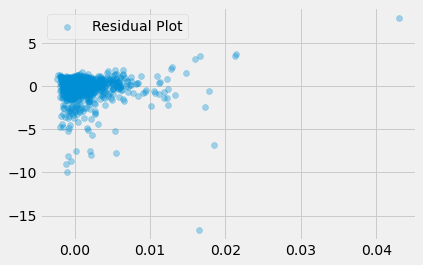

In [29]:
plot_model(x_train, y_train)

array([[<AxesSubplot:title={'center':'Infection_rate_change'}>]],
      dtype=object)

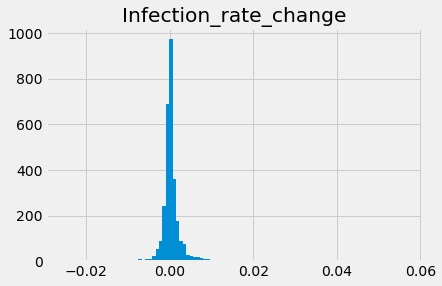

In [30]:
target.hist(bins=100)

DensPerSqMile
New_case_rate
per_gop
per_dem
low_mask_adoption
mask_adoption
AnyVaccineHesitancy
FullyVaccinatedAdults
PercReligion
EconomicRegion_Far West
EconomicRegion_Great Lakes
EconomicRegion_Mideast
EconomicRegion_New England
EconomicRegion_Plains
EconomicRegion_Rocky Mountain
EconomicRegion_Southeast
EconomicRegion_Southwest
Family_Amish
Family_Black Church
Family_Catholic
Family_Evangelical
Family_Mainline
Family_Mennonite
Family_Mormon
Family_Non-denominational
Family_mormon


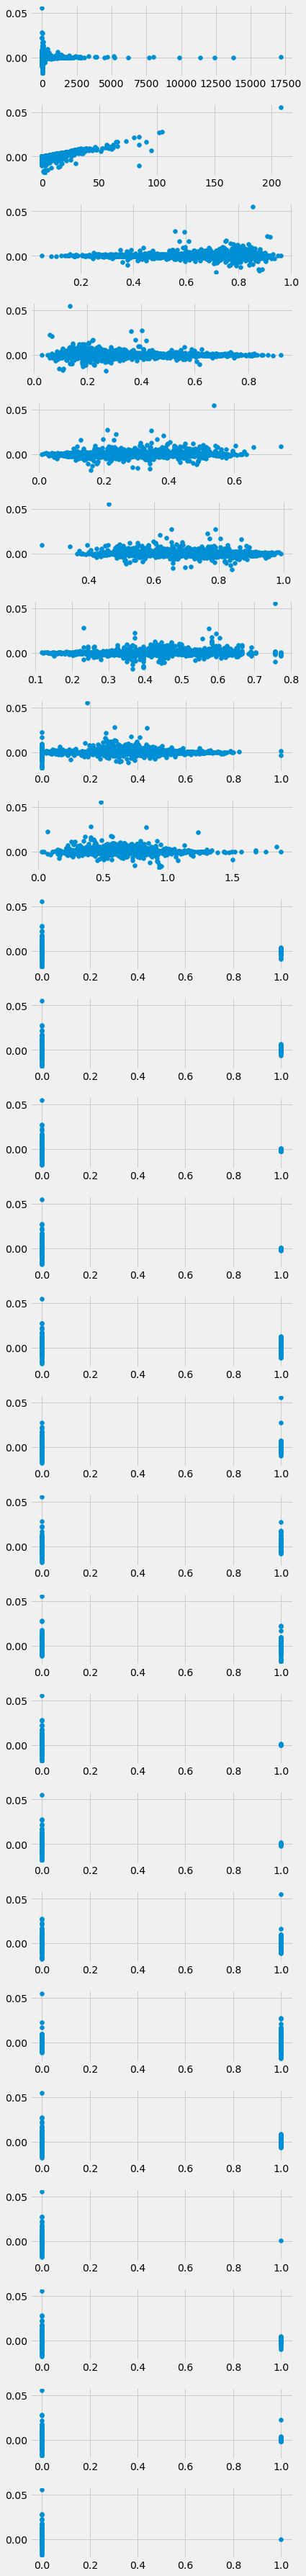

In [45]:
all_columns = x_train.columns
fig, axs = plt.subplots(len(all_columns), figsize=(6,50))
fig.tight_layout()

for idx, col in enumerate(all_columns):
    print(col)
    axs[idx].scatter(x_train[col],y_train)
    


In [ ]:
x_train.columns
'''
0  'DensPerSqMile'
1 'New_case_rate'
2 'per_gop'
3 'per_dem'
4 'low_mask_adoption'
5 'mask_adoption'
6 'AnyVaccineHesitancy'
7 'FullyVaccinatedAdults'
8 'PercReligion'
9 'EconomicRegion_Far West'
10 'EconomicRegion_Great Lakes'
11 'EconomicRegion_Mideast'
12 'EconomicRegion_New England'
13 'EconomicRegion_Plains'
14 'EconomicRegion_Rocky Mountain'
15 'EconomicRegion_Southeast'
16 'EconomicRegion_Southwest'
17 'Family_Amish'
18 'Family_Black Church'
19 'Family_Catholic'
20 'Family_Evangelical'
21 'Family_Mainline'
22 'Family_Mennonite'
23 'Family_Mormon'
24 'Family_Non-denominational'
25 'Family_mormon'
'''

Index(['DensPerSqMile', 'New_case_rate', 'per_gop', 'per_dem',
       'low_mask_adoption', 'mask_adoption', 'AnyVaccineHesitancy',
       'FullyVaccinatedAdults', 'PercReligion', 'EconomicRegion_Far West',
       'EconomicRegion_Great Lakes', 'EconomicRegion_Mideast',
       'EconomicRegion_New England', 'EconomicRegion_Plains',
       'EconomicRegion_Rocky Mountain', 'EconomicRegion_Southeast',
       'EconomicRegion_Southwest', 'Family_Amish', 'Family_Black Church',
       'Family_Catholic', 'Family_Evangelical', 'Family_Mainline',
       'Family_Mennonite', 'Family_Mormon', 'Family_Non-denominational',
       'Family_mormon'],
      dtype='object')

Coefficients:  [[ 4.86236430e-08  2.14953618e-04 -6.99090781e-03 -6.57929752e-03
   7.35685080e-02  7.25859824e-02 -5.30876091e-04  1.36094346e-03
  -1.24510499e-04 -4.81271413e-04  1.87390482e-04  2.66477737e-04
   8.84302311e-05  1.21464943e-04 -2.34454571e-04  5.48870299e-06
   4.64738721e-05  6.73545305e-04 -1.04466213e-04 -1.35572844e-04
   1.50594415e-04 -1.16499820e-05  1.73419613e-04 -4.15877963e-04
  -9.76156655e-05 -2.32376654e-04]]
Variance score: 0.5934283348007743
Mean squared error: 0.00


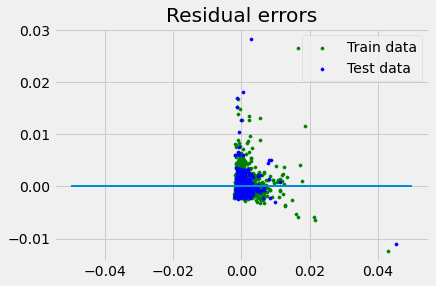

In [13]:
from sklearn import datasets, linear_model, metrics

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(x_test, y_test)))
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test,  reg.predict(x_test)))

plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = -0.05, xmax = 0.05, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [ ]:
#decision tree regression

In [ ]:
#random forest regression

In [ ]:
#cross-validation of model with best results - build a regression class